# Closeness Centrality beritajatim

## Load Data

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import networkx as nx
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ppw/beritajatim.csv")
data

,Judul,Isi,Kategori
0,Timnas Indonesia Bakal Turunkan Amar Rayhan La...,Surabaya (beritajatim.com) –Timnas Indonesia U...,Sport
1,Tim PKM UB Malang Kenalkan Metode Penanaman Ve...,Malang (beritajatim.com)– Tim Program Kreativi...,Pendidikan
2,"Prabowo: Seribu Teman Terlalu Sedikit, Satu Mu...",Surabaya (beritajatim.com) –Calon Presiden Koa...,Politik
3,96 Persen Warga Nganjuk Terlindungi Jaminan Ke...,Nganjuk (beritajatim.com) –Pemerintah Kabupate...,Pendidikan
4,Ratusan Guru Ngaji di Ring Satu Petrokimia Gre...,Gresik (beritajatim.com) –Ratusan guru mengaji...,Pendidikan
5,PT SBI Tuban Beri Sosialisasi Bahaya Area Tamb...,Bagikan ini,Pendidikan
6,Fakhri Husaini Imbau Tak Kritik Berlebihan Tim...,Surabaya (beritajatim.com)– Performa Timnas In...,Sport
7,Tim Spektronics ITS Surabaya Juara Dua Chem E-...,Surabaya (beritajatim.com) –Tim Spektronics IT...,Pendidikan
8,"Peserta SKD CASN Kota Malang Gagal Login, Ini ...",Malang (beritajatim.com)– Ujian Seleksi Kompet...,Politik
9,Indonesia Ingin Cetak Sejarah Lewat Piala Duni...,Surabaya (beritajatim.com)– Indonesia ingin ca...,Sport


In [ ]:
pd.crosstab(index=data['Kategori'], columns='count')

col_0,count
Kategori,
Pendidikan,10
Politik,6
Sport,4


## Tokenisasi per Kalimat

In [ ]:
hasil_kalimat=[]
for i in range(len(data)):
  token = sent_tokenize(data['Isi'][i])
  hasil_kalimat.append(token)

In [ ]:
kalimat = []
for i in range(len(hasil_kalimat)):
  for x in range (len(hasil_kalimat[i])):
    datacek = []
    datacek.append(i)
    datacek.append(hasil_kalimat[i][x])
    kalimat.append(datacek)

In [ ]:
databaru = pd.DataFrame(kalimat, columns=["Dokumen ke", "Kalimat"])
databaru

,Dokumen ke,Kalimat
0,0,Surabaya (beritajatim.com) –Timnas Indonesia U...
1,0,Bima Sakti mengatakan bahwa kondisi Amar saat ...
2,0,Kondisinya jauh lebih baik dari sebelumnya.“Am...
3,0,Bahkan jajaran pelatih juga telah menginfokan ...
4,0,Sudah kita infokan pemain dan kita tanya ke pe...
...,...,...
220,19,"Di satu sisi, mereka sudah terjerat utang, dan..."
221,19,"Oleh karena itu, dia berharap agar pemerintah ..."
222,19,"Oleh karena itu, diperlukan regulasi yang tepa..."
223,19,"Selain itu, perlu pengawasan yang ketat untuk ..."


## Cleansing

In [ ]:
#Remove Puncutuation
clean_symbol = re.compile('[^\w\s.?!,/]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = databaru['Kalimat'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean['Dokumen ke']=databaru['Dokumen ke'].values
clean

,Kalimat,Dokumen ke
0,Surabaya beritajatim.com Timnas Indonesia U...,0
1,Bima Sakti mengatakan bahwa kondisi Amar saat ...,0
2,Kondisinya jauh lebih baik dari sebelumnya. Am...,0
3,Bahkan jajaran pelatih juga telah menginfokan ...,0
4,Sudah kita infokan pemain dan kita tanya ke pe...,0
...,...,...
220,"Di satu sisi, mereka sudah terjerat utang, dan...",19
221,"Oleh karena itu, dia berharap agar pemerintah ...",19
222,"Oleh karena itu, diperlukan regulasi yang tepa...",19
223,"Selain itu, perlu pengawasan yang ketat untuk ...",19


## TF-TDF

In [ ]:
# Menghitung TF-IDF

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(clean['Kalimat'])

## Cosine Similarity

In [ ]:
# Menghitung cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
len(cosine_similarities)

225

In [ ]:
threshold=0.5
G = nx.Graph()
for i in range(len(cosine_similarities)):
    for j in range( len(cosine_similarities)):
      sim = cosine_similarities[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)
        print(i,',',j,'=',sim)

0 , 0 = 1.0000000000000002
1 , 1 = 1.0000000000000004
2 , 2 = 1.0
3 , 3 = 1.0000000000000002
4 , 4 = 1.0000000000000004
5 , 5 = 1.0
6 , 6 = 1.0000000000000002
7 , 7 = 1.0
8 , 8 = 1.0000000000000002
8 , 59 = 0.5830079089305031
8 , 86 = 0.5729476813842828
9 , 9 = 1.0000000000000002
10 , 10 = 1.0
11 , 11 = 1.0000000000000002
12 , 12 = 1.0000000000000002
13 , 13 = 1.0000000000000002
14 , 14 = 1.0000000000000002
15 , 15 = 1.0000000000000002
16 , 16 = 1.0000000000000002
17 , 17 = 1.0
18 , 18 = 1.0000000000000002
19 , 19 = 1.0
20 , 20 = 1.0
21 , 21 = 1.0000000000000002
22 , 22 = 1.0
23 , 23 = 1.0
23 , 39 = 0.7082381512061704
23 , 50 = 0.6116527235003546
23 , 113 = 0.9617324710957255
23 , 164 = 0.7082381512061704
24 , 24 = 1.0
25 , 25 = 0.9999999999999999
26 , 26 = 1.0000000000000002
27 , 27 = 1.0000000000000004
28 , 28 = 1.0
29 , 29 = 1.0
30 , 30 = 1.0000000000000002
31 , 31 = 1.0
32 , 32 = 1.0000000000000002
32 , 65 = 0.6031623290060101
33 , 33 = 0.9999999999999999
34 , 34 = 1.00000000000000

## Closeness Centrality

In [ ]:
# # Membuat graf untuk closeness centrality
# G = nx.from_numpy_array(cosine_similarities)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menambahkan closeness centrality ke dalam dataframe kalimat
clean['Closeness Centrality'] = [closeness_centrality[i] for i in range(len(databaru))]

# Menampilkan dataframe kalimat
clean

,Kalimat,Dokumen ke,Closeness Centrality
0,Surabaya beritajatim.com Timnas Indonesia U...,0,0.000000
1,Bima Sakti mengatakan bahwa kondisi Amar saat ...,0,0.000000
2,Kondisinya jauh lebih baik dari sebelumnya. Am...,0,0.000000
3,Bahkan jajaran pelatih juga telah menginfokan ...,0,0.000000
4,Sudah kita infokan pemain dan kita tanya ke pe...,0,0.000000
...,...,...,...
220,"Di satu sisi, mereka sudah terjerat utang, dan...",19,0.000000
221,"Oleh karena itu, dia berharap agar pemerintah ...",19,0.000000
222,"Oleh karena itu, diperlukan regulasi yang tepa...",19,0.000000
223,"Selain itu, perlu pengawasan yang ketat untuk ...",19,0.000000


In [ ]:
# databaru.to_csv('/content/drive/MyDrive/ppw/tugas/tugas_ppw/closeness_centrality_threshould.csv', index=False)

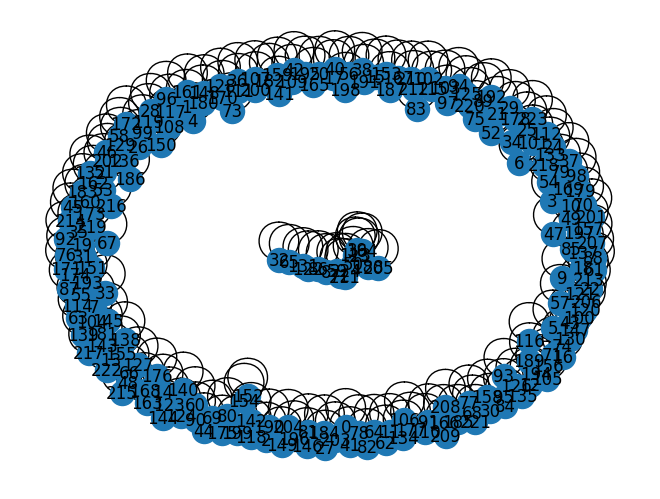

In [ ]:
# pos = nx.spring_layout(G)
nx.draw(G, with_labels=True)

## Hasil Ringkasan

In [ ]:
# Mengelompokkan DataFrame berdasarkan 'Dokumen ke' dan mengurutkan nilai Closeness Centrality
sorted_df = clean.sort_values(by=['Dokumen ke', 'Closeness Centrality'], ascending=[True, False]).reset_index()

# Menampilkan DataFrame yang telah diurutkan
sorted_df

,index,Kalimat,Dokumen ke,Closeness Centrality
0,8,way/but Bagikan ini,0,0.027211
1,0,Surabaya beritajatim.com Timnas Indonesia U...,0,0.000000
2,1,Bima Sakti mengatakan bahwa kondisi Amar saat ...,0,0.000000
3,2,Kondisinya jauh lebih baik dari sebelumnya. Am...,0,0.000000
4,3,Bahkan jajaran pelatih juga telah menginfokan ...,0,0.000000
...,...,...,...,...
220,219,"Ini harus diakui oleh masyarakat, jelasnya.BA...",19,0.000000
221,220,"Di satu sisi, mereka sudah terjerat utang, dan...",19,0.000000
222,221,"Oleh karena itu, dia berharap agar pemerintah ...",19,0.000000
223,222,"Oleh karena itu, diperlukan regulasi yang tepa...",19,0.000000


In [ ]:
# Mengambil 4 kalimat dengan nilai closeness centrality tertinggi untuk setiap 'Dokumen ke'
top_4_sentences = sorted_df.groupby('Dokumen ke').head(4)
top_4_sentences

,index,Kalimat,Dokumen ke,Closeness Centrality
0,8,way/but Bagikan ini,0,0.027211
1,0,Surabaya beritajatim.com Timnas Indonesia U...,0,0.000000
2,1,Bima Sakti mengatakan bahwa kondisi Amar saat ...,0,0.000000
3,2,Kondisinya jauh lebih baik dari sebelumnya. Am...,0,0.000000
9,23,dan/ted Bagikan ini,1,0.025974
...,...,...,...,...
209,208,Sehingga sejalan dengan keinginan pihaknya aga...,18,0.000000
212,224,beq Bagikan ini,19,0.030075
213,212,Jakarta beritajatim.com Dalam era digital i...,19,0.000000
214,213,Fitur paylater menawarkan opsi Buy Now Pay La...,19,0.000000


In [ ]:
# Menggabungkan teks 'Kalimat' berdasarkan 'Dokumen ke' yang sama
result = top_4_sentences.groupby('Dokumen ke')['Kalimat'].apply(' '.join).reset_index()

# Menampilkan hasil penggabungan
result

,Dokumen ke,Kalimat
0,0,way/but Bagikan ini Surabaya beritajatim.com...
1,1,dan/ted Bagikan ini Malang beritajatim.com ...
2,2,tok/ian Bagikan ini Surabaya beritajatim.com...
3,3,nm/ted Bagikan ini Nganjuk beritajatim.com ...
4,4,Gresik beritajatim.com Ratusan guru mengaji...
5,5,Bagikan ini
6,6,way/beq Bagikan ini Surabaya beritajatim.com...
7,7,ipl/ian Bagikan ini Surabaya beritajatim.com...
8,8,luc/beq Bagikan ini Malang beritajatim.com ...
9,9,Way/Aje Bagikan ini Surabaya beritajatim.com...


## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# Menghitung TF-IDF
vec = TfidfVectorizer()
tfidf_result = vec.fit_transform(result['Kalimat']).toarray()

In [ ]:
y=data['Kategori']
X_train,X_test,y_train,y_test = train_test_split(tfidf_result,y,test_size=0.2,random_state=42)

In [ ]:
NB = GaussianNB()
gaus=NB.fit(X_train, y_train)

In [ ]:
y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.5
